In [1]:
# The standard start of our notebooks
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

#  Clustering

## Data

In [2]:
# Load the data, which is included in sklearn.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target).replace(to_replace=dict(enumerate(iris.target_names)))

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object

## KMeans

Use KMeans to segment the iris data into two clusters

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)

labels = km.fit_predict(X)





In [6]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [7]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Plot each of the 2D projections to see if the clustering "makes sense"

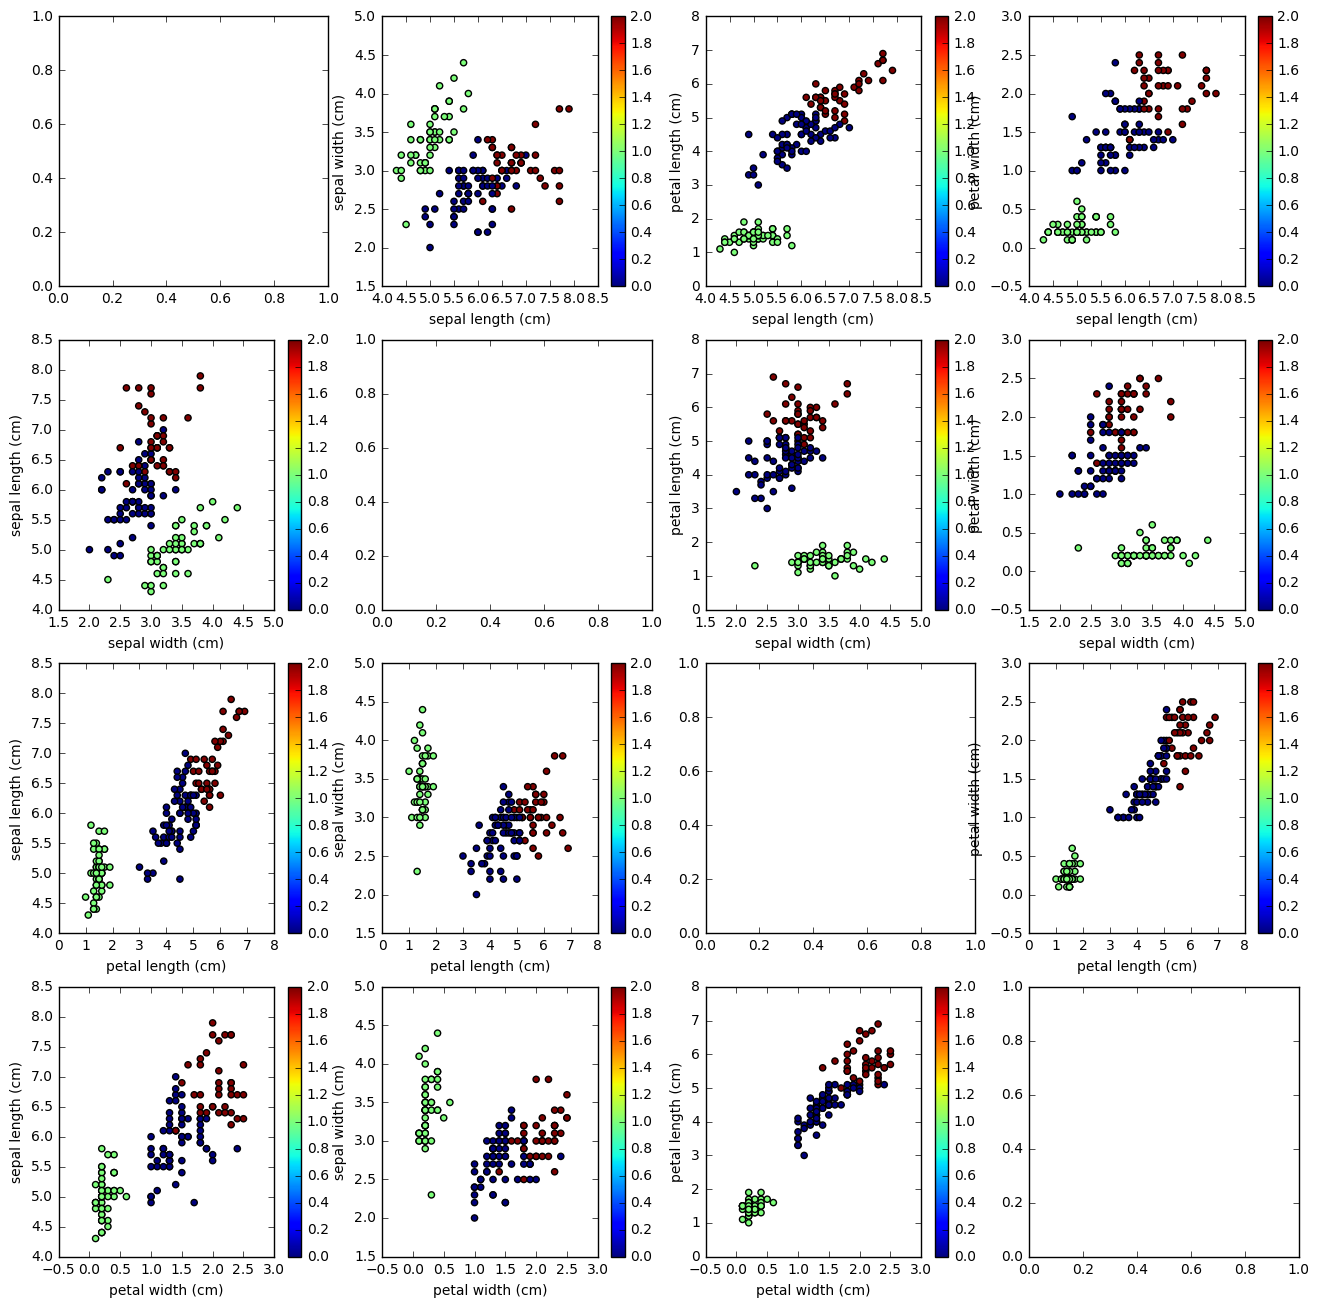

In [8]:
import matplotlib.cm as cm

fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

cmap = cm.jet
for i, f1 in enumerate(X.columns):
    for j, f2 in enumerate(X.columns):
       if not f1 == f2:
        X.plot(kind='scatter', x=f1, y=f2, c=labels, cmap=cmap, ax=axes[i, j])
        
            
plt.show()

Compare to the actual labels

In [9]:
pd.crosstab(y, labels)

col_0,0,1,2
row_0,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


Repeat the above for three or more clusters

## Pick number of clusters using scree plot

We would like to have a more data-driven approach to choosing the right number of clusters. Especially when we do not have any true labels.

### Exercise: 
(a) Plot k vs RSS for k between 1 and 10

(b) See how easily you can add a StandardScaler() step to kmeans. (That is, normalize the columns)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


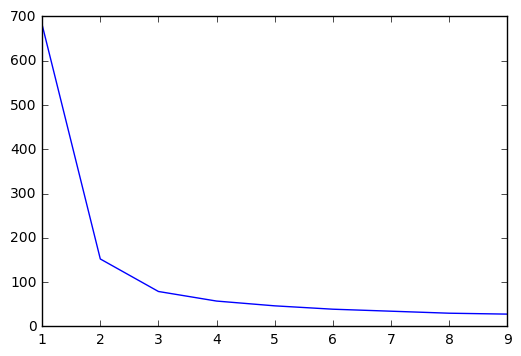

[680.82440000000042,
 152.36870647733889,
 78.940841426145937,
 57.317873214285946,
 46.535582051282461,
 38.938739743589899,
 34.429724358974333,
 29.889178904429357,
 27.842356060606484]

In [11]:
k_vals_to_try = np.arange(1,10).tolist()

RSS_scores = []

for k in k_vals_to_try:
    
    #instantiate the classifieer
    km = KMeans(n_clusters = k)

    #Fit the model
    km.fit(X)
    
    #get the residual sum of squares
    rss = -km.score(X)
    
    RSS_scores.append(rss)
    
plt.plot(k_vals_to_try, RSS_scores)
plt.show()

RSS_scores
    

## Silhouette Scores

Silhouette scores are a slightly better measure of cluster 'goodness' since they take into effect the density of each cluster as well as the distance _between_ clusters.

In [12]:
from silhouette import silhouette_plot
from sklearn.metrics import silhouette_samples, silhouette_score



In [ ]:
#Unfinished

clusts = range(2,10)

def kmeans_silhouette_score(nclust):
    km = Pipeline(steps = [
            ('scale', standardscaler()),
            ('kmeans', KMeans(n_clusters = nclust))
            ]
            

In [13]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

For n_clusters = 2 The average silhouette_score is : 0.68639305432


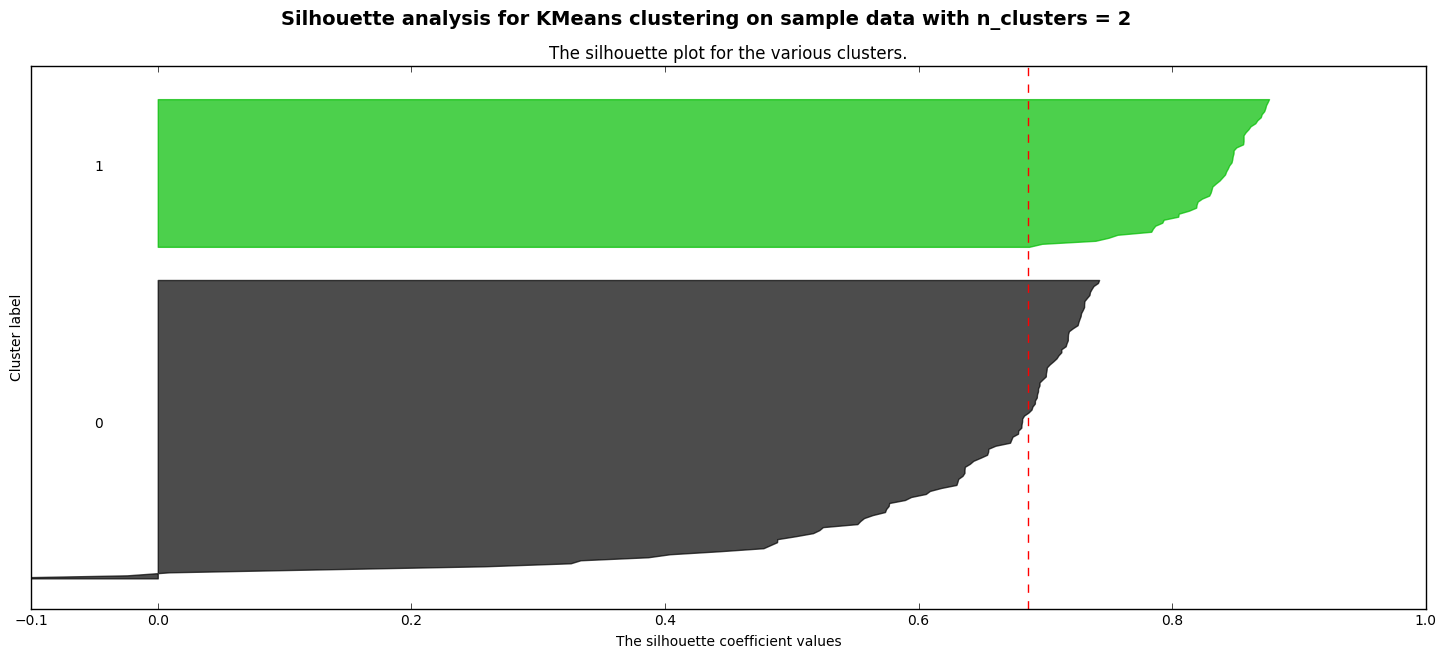

For n_clusters = 3 The average silhouette_score is : 0.493611278726


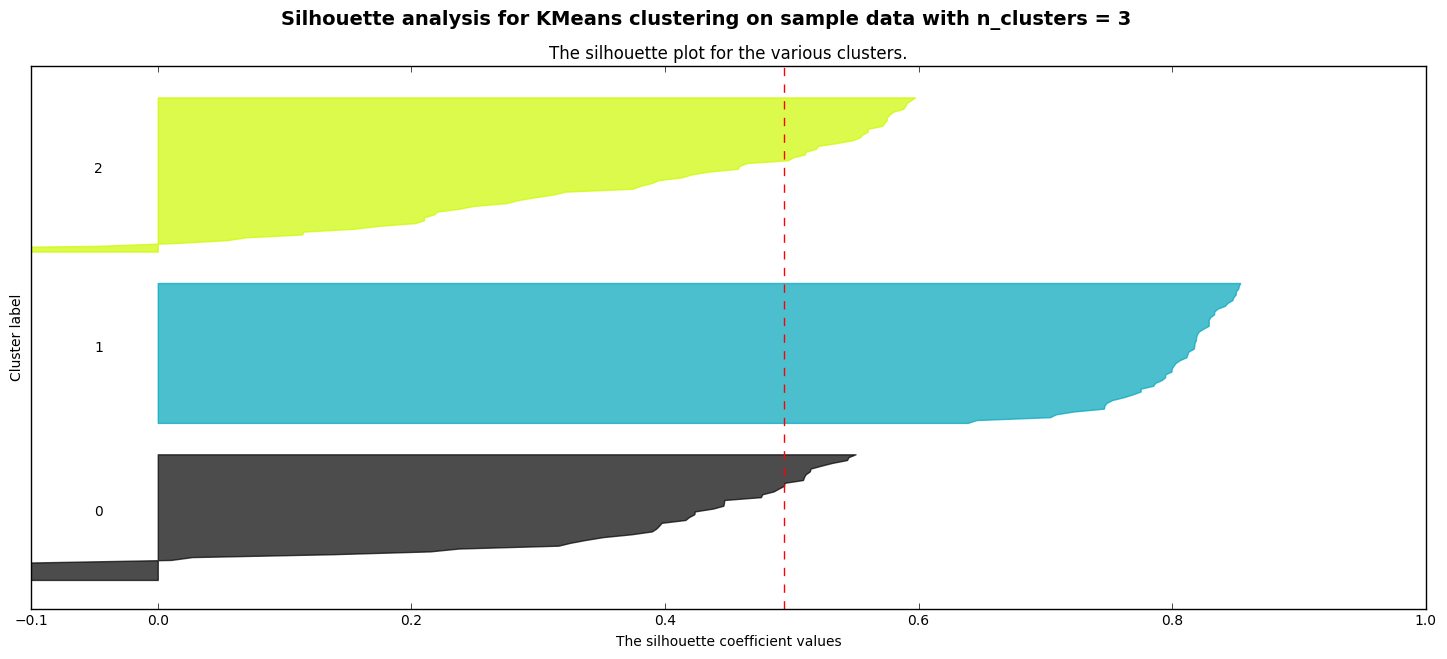

For n_clusters = 4 The average silhouette_score is : 0.352959898019


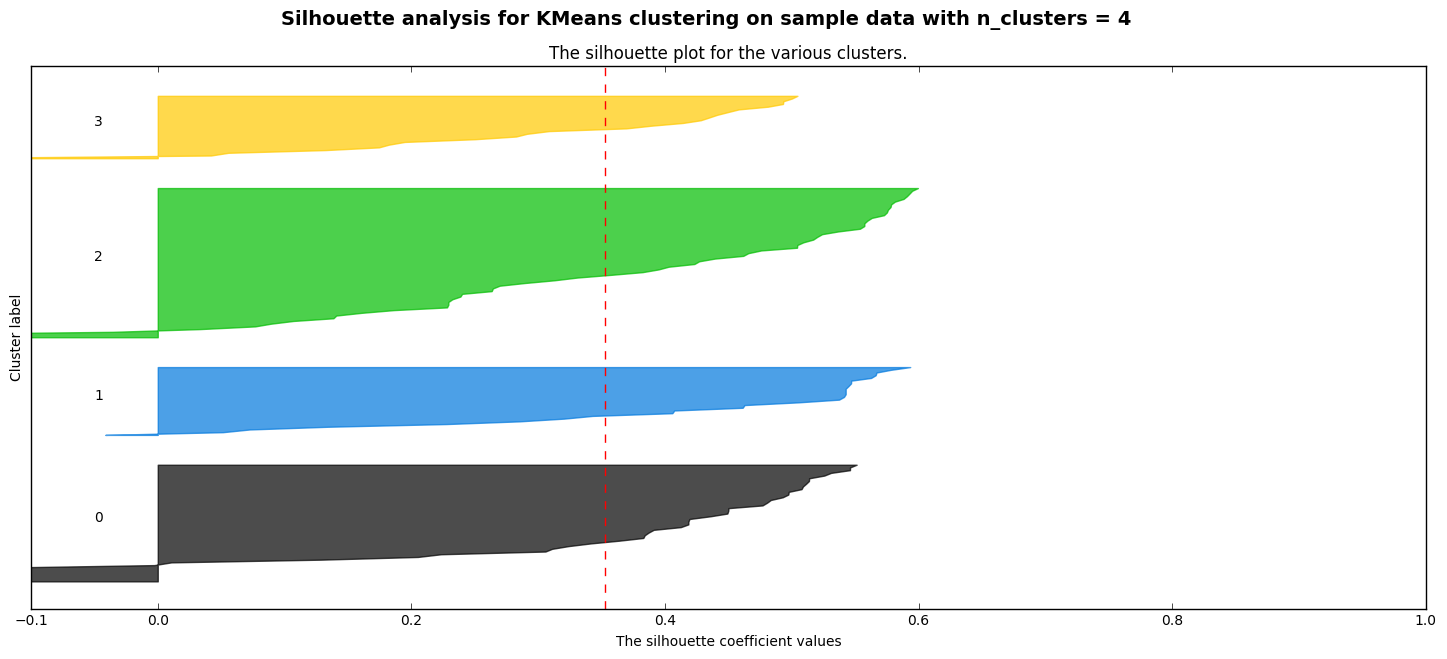

For n_clusters = 5 The average silhouette_score is : 0.320368125127


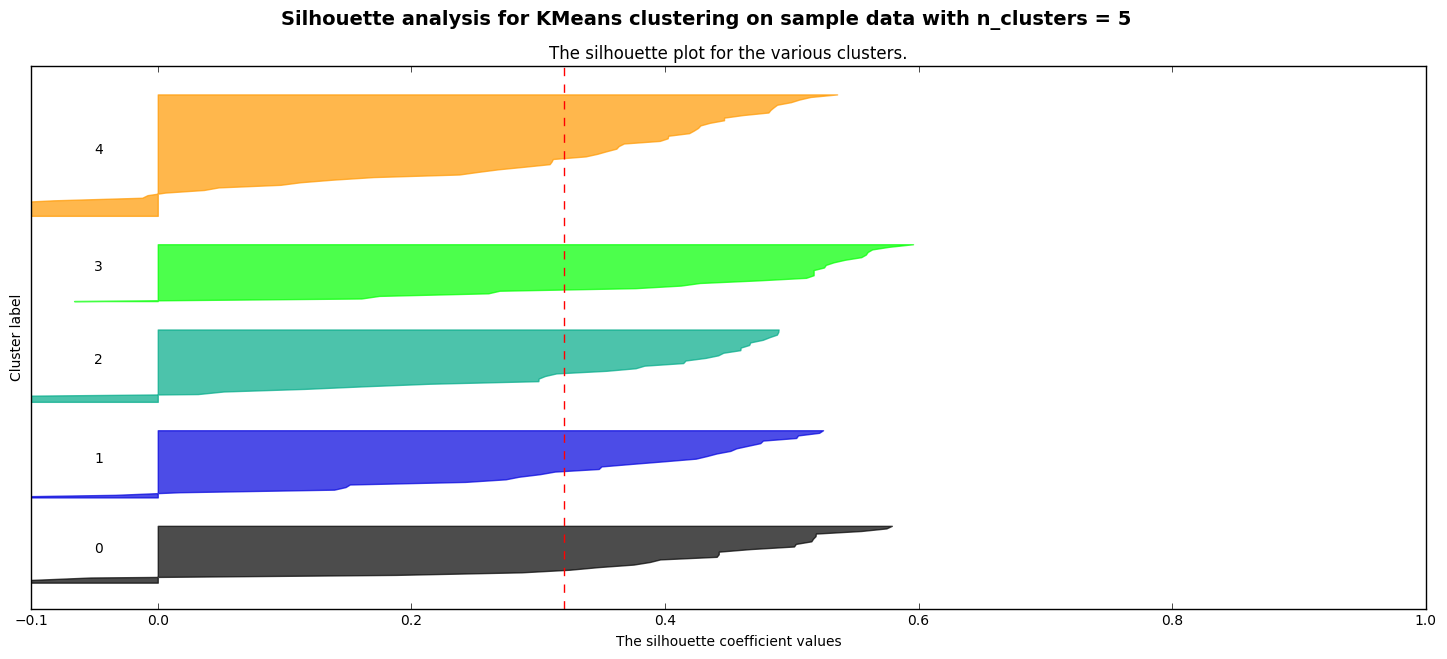

For n_clusters = 6 The average silhouette_score is : 0.283587496222


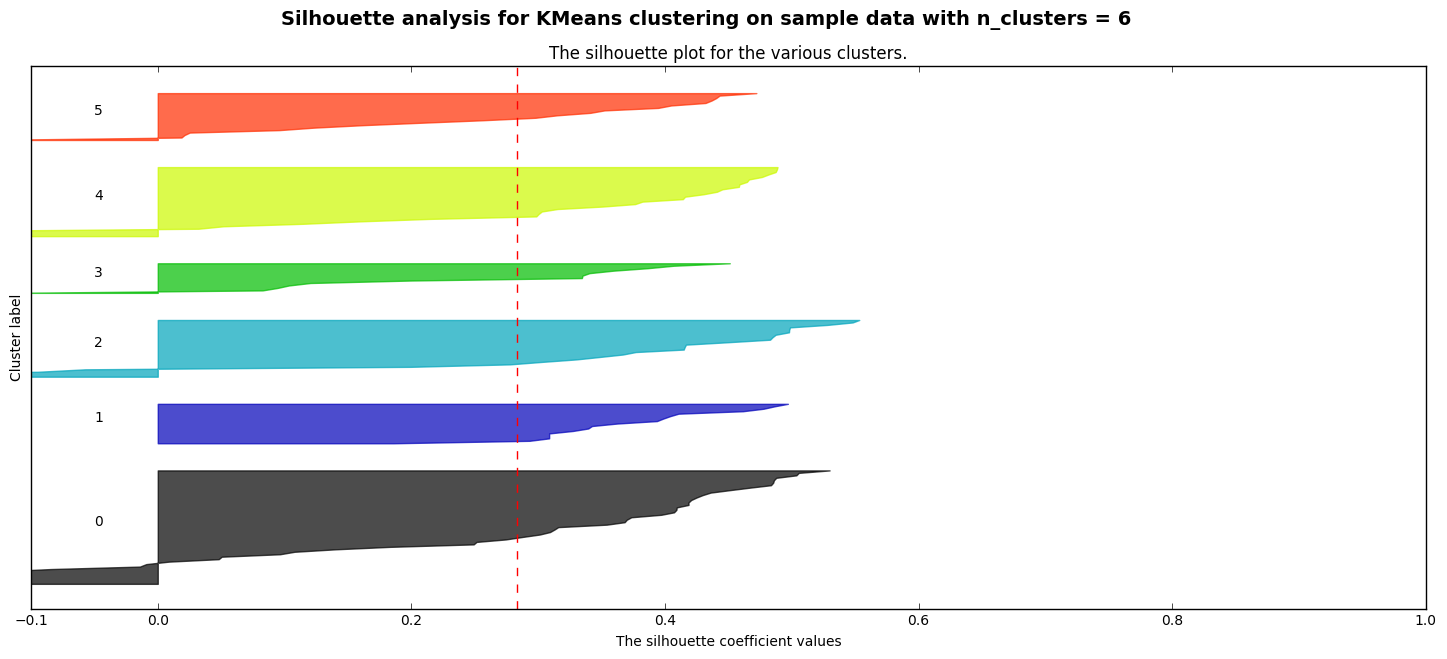

In [14]:
for i in range(2, 7):
    clusterer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('kmeans', KMeans(i))
    ])
    silhouette_plot(X, y, clusterer, i)

## Hierarchical Clustering

Use scipy for this one

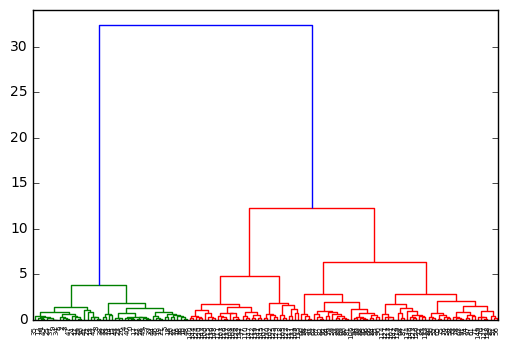

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

clusters = linkage(X, 'ward')
_ = dendrogram(clusters)

#Every single data point is on X axis.
#Height on Y axis is distance between clusters when they join.

In [19]:
#Tell to cut at height of 7
labels = fcluster(clusters, 7, depth=10)

In [20]:
pd.crosstab(y, labels)

col_0,1,2,3
row_0,,,
setosa,50,0,0
versicolor,0,1,49
virginica,0,35,15


## DBSCAN

For DBSCAN, we need to pick `min_samples` and $\epsilon$. One way to do this:

1. Fix a value of `min_samples` that makes sense.
2. Try a wide range of values for $\epsilon$ and record the number of unique labels for each one.
3. Look for a persistent number of clusters over a wide range of $\epsilon$

In [22]:
from sklearn.cluster import DBSCAN



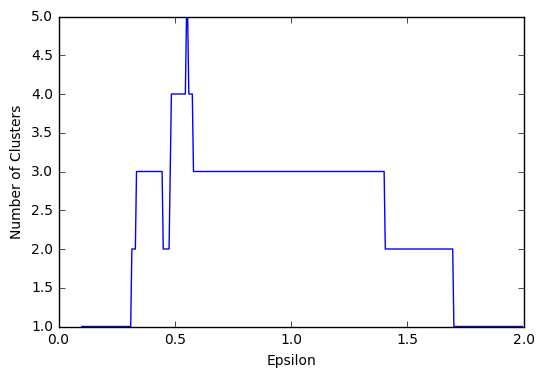

In [47]:
#Min samples is more so a function of the number of points in your data set

#Try a bunch of different epsilons
epsilons_to_try = np.arange(.1, 2, .005).tolist()

number_of_K_results = []

def dbscan_get_num_ks(epsilon):
    
    #instantiate a classifier
    db = Pipeline([('scale', StandardScaler()), ('DBSCAN', DBSCAN(min_samples = 10, eps = epsilon))])

    #fit the model
    labels = db.fit_predict(X)

    #get number of labels
    num_labels = np.unique(labels).shape[0]
    
    return num_labels

number_of_K_results = [dbscan_get_num_ks(e) for e in epsilons_to_try]




plt.plot(epsilons_to_try, number_of_K_results)
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.show()


Pick a few representative choices for $\epsilon$ and see how the clusters compare to the true labels.

In [48]:
#instantiate the classifier
db = Pipeline([('scale', StandardScaler()), ('DBSCAN', DBSCAN(min_samples = 10, eps = 1))])

labels = db.fit_predict(X)

pd.crosstab(y, labels)

col_0,-1,0,1
row_0,,,
setosa,1,49,0
versicolor,1,0,49
virginica,2,0,48
